In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
def hit_and_run_sampler(a, num_samples):
    n = len(a)
    samples = []
    for _ in range(num_samples):
        # Generate a random direction vector
        direction = np.random.randn(n)
        direction /= np.linalg.norm(direction)  # Normalize

        # Generate a random point on the surface of B_a
        point = a * direction
        samples.append(point)

    return np.array(samples)

In [ ]:
# user input for a list of radii (comma-separated)
radius_str = input("Enter the radius of the hyperball (separated by commas for dimensions): ")
radii_list = [float(radius.strip()) for radius in radius_str.split(",")]
# Handeling any negative radii
if any(radius <= 0 for radius in radii_list):
    print("Please enter positive values for the radii.")
    exit(1)


In [72]:
num_samples_to_generate = 10000
generated_samples = hit_and_run_sampler(np.array(radii_list), num_samples_to_generate)

# Parallel tempering parameters
num_chains = 1  # Choose an appropriate number of chains (m)
# Initialize chains
chains = [hit_and_run_sampler(np.array(radii_list), num_samples_to_generate) for _ in range(num_chains)]


In [73]:
# Calculate the volume of B1 (unit hyperball) for each radius
for i, radius in enumerate(radii_list):
    n = len(radii_list)
    volume_B1 = (np.pi**(n/2)) / math.gamma(n/2 + 1) * radius**n
    print(f"Volume of B1 (radius {radius:.2f}): {volume_B1:.6f}\n")
print("Generated Samples: ", generated_samples)

Volume of B1 (radius 2.00): 4.000000

Generated Samples:  [[ 2.]
 [ 2.]
 [ 2.]
 ...
 [-2.]
 [ 2.]
 [-2.]]


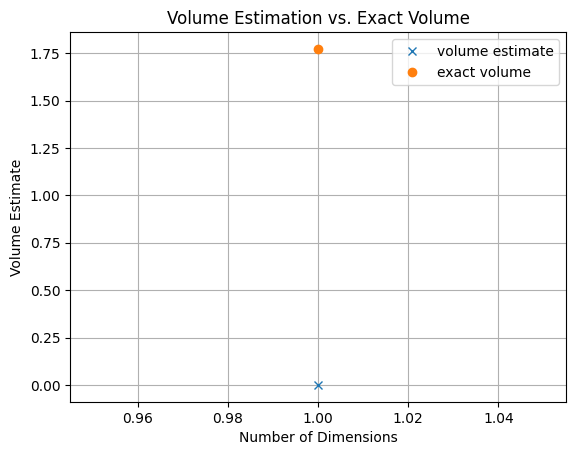

In [77]:
# Calculate the volume of B1 (unit hyperball) for each chain
volumes_B1 = []
for chain in chains:
    volume_B1 = np.sum(np.linalg.norm(chain, axis=1) <= 1) / num_samples_to_generate
    volumes_B1.append(volume_B1)

# Create a scatter plot
dimensions = len(radii_list)
plt.plot(range(1, dimensions + 1), volumes_B1, 'x', label='volume estimate')
plt.plot(range(1, dimensions + 1), [np.pi**(d/2) for d in range(1, dimensions + 1)], 'o', label='exact volume')
plt.xlabel("Number of Dimensions")
plt.ylabel("Volume Estimate")
plt.title("Volume Estimation vs. Exact Volume")
plt.legend()
plt.grid(True)
plt.show()
